****** Este Jupyter Notebook foi atualizado para a versão 3.6.1 da Linguagem Python em 05/06/2017 ******

 Autor: Ricardo Roberto de Lima
 Data: 13/08/2020

# Análise Exploratória de Dados

### Neste notebook usaremos uma pesquisa recente nos EUA sobre o mercado de trabalho para programadores de software. Nosso objetivo é fazer uma investigação inicial dos dados a fim de detectar problemas com os dados, necessidade de mais variáveis, falhas na organização e transformação.

### Pesquisa Salarial realizada pelo site https://www.freecodecamp.com/ com programadores de software nos EUA que frequentaram treinamentos Bootcamp

In [4]:
# Importando os pacotes e o dataset

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colorsys
plt.style.use('seaborn-talk')

df = pd.read_csv("Dados-Pesquisa-2016.csv", sep = ',', low_memory=False)

In [5]:
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


In [6]:
print(df.describe())

                Age  AttendedBootcamp  BootcampFinish  BootcampFullJobAfter  \
count  13613.000000      15380.000000      933.000000            635.000000   
mean      29.175421          0.061964        0.689175              0.584252   
std        9.017716          0.241097        0.463080              0.493239   
min       10.000000          0.000000        0.000000              0.000000   
25%       23.000000          0.000000        0.000000              0.000000   
50%       27.000000          0.000000        1.000000              1.000000   
75%       33.000000          0.000000        1.000000              1.000000   
max       86.000000          1.000000        1.000000              1.000000   

       BootcampLoanYesNo  BootcampMonthsAgo  BootcampPostSalary  \
count         934.000000         631.000000          330.000000   
mean            0.332976           9.055468        63740.506061   
std             0.471531          12.968035        26347.200265   
min             0.00

## Distribuição de Idade

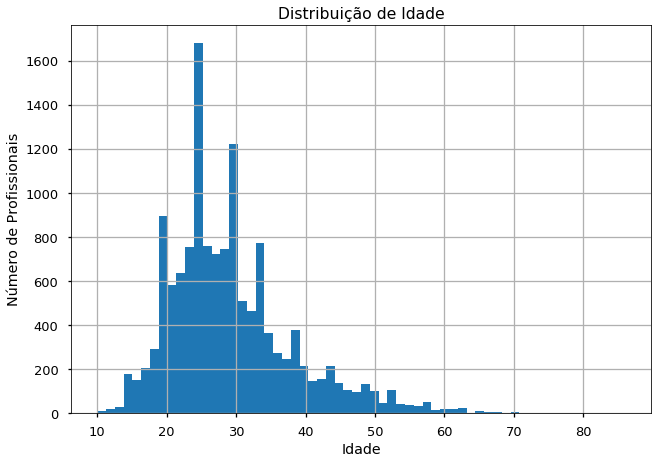

In [7]:
# A maioria dos profissionais que trabalham como programadores de 
# software estão na faixa de idade entre 20 e 30 anos, sendo 25 anos 
# a idade mais frequente.

# Gerando um histograma
df.Age.hist(bins = 60)
plt.xlabel("Idade")
plt.ylabel("Número de Profissionais")
plt.title("Distribuição de Idade")
plt.show()

## Distribuição de sexo

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


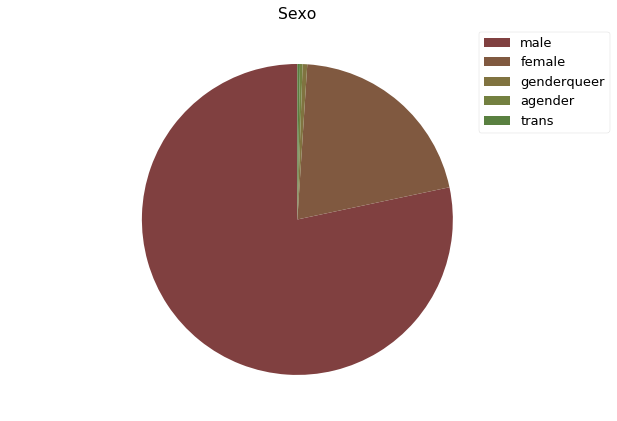

In [8]:
# A grande maioria dos programadores são do sexo masculino

# Definindo a quantidade
labels = df.Gender.value_counts().index
num = len(df.EmploymentField.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Pizza
fatias, texto = plt.pie(df.Gender.value_counts(), colors = listaRGB, 
                        startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05,1))
plt.title("Sexo")
plt.show()

## Distribuição de Interesses

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


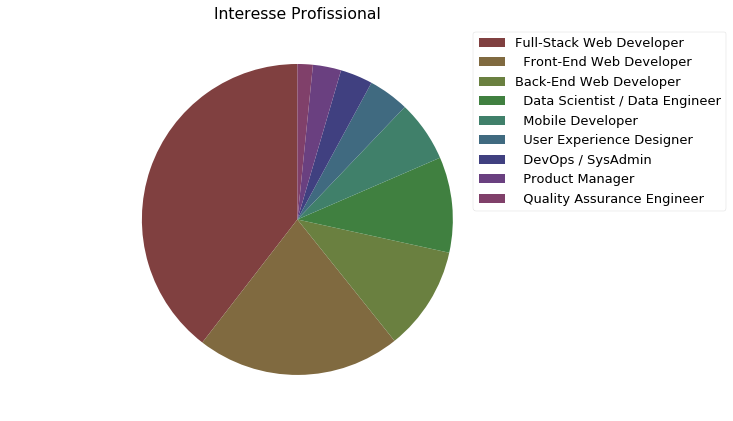

In [9]:
# O principal interesse profissional dos programadores é o desenvolvimento 
# web (Full-Stack, Front-End e Back-End, seguido pela área de Data Science.

# Definindo a quantidade
num = len(df.JobRoleInterest.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))
labels = df.JobRoleInterest.value_counts().index
colors = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 
          'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']

# Gráfico de Pizza
fatias, texto = plt.pie(df.JobRoleInterest.value_counts(), 
                        colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.25, 1))
plt.title("Interesse Profissional")
plt.show()

## Distribuição de Empregabilidade

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


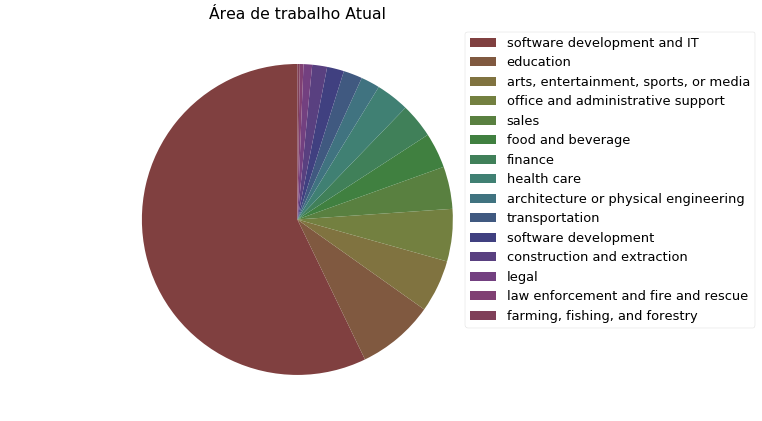

In [10]:
# A maioria dos programadores trabalha na área de desenvolvimento de 
# softwares e TI, mas outras áreas como finanças e saúde também são 
# significativas.

# Definindo a quantidade
num = len(df.EmploymentField.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))
labels = df.EmploymentField.value_counts().index

# Gráfico de Pizza
fatias, texto = plt.pie(df.EmploymentField.value_counts(), 
                        colors = listaRGB, startangle = 90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.3, 1))
plt.title("Área de trabalho Atual")
plt.show()

## Preferências de trabalho por idade

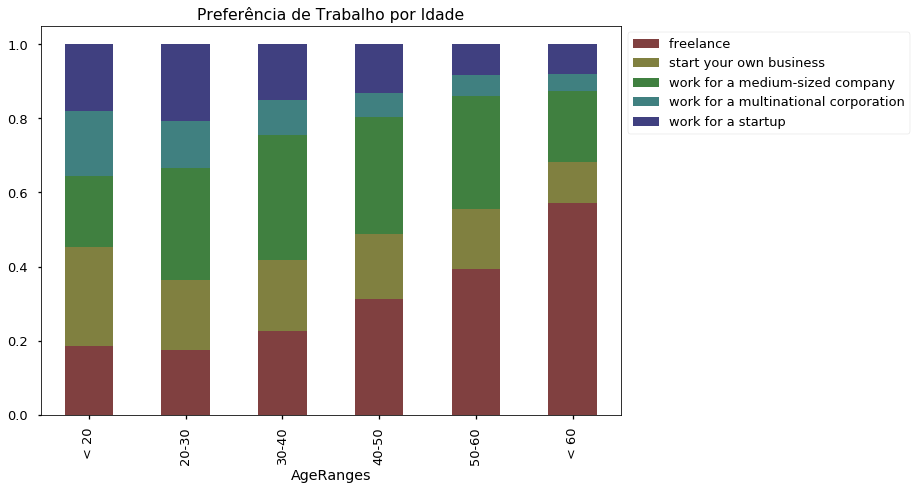

In [12]:
# Perceba que à medida que a idade aumenta, o interesse por trabalho 
# freelance também aumenta, sendo o modelo preferido por profissionais 
# acima de 60 anos. Profissionais mais jovens preferem trabalhar em 
# Startups ou no seu próprio negócio. Profissionais entre 20 e 50 anos 
# preferem trabalhar em empresas de tamanho médio.

# Agrupando os dados
df_ageranges = df.copy()
bins=[0, 20, 30, 40, 50, 60, 100]
df_ageranges['AgeRanges'] = pd.cut(df_ageranges['Age'], bins, 
                                   labels=["< 20", "20-30", "30-40", 
                                           "40-50", "50-60", "< 60"]) 
df2 = pd.crosstab(df_ageranges.AgeRanges, 
                  df_ageranges.JobPref).apply(lambda r: r/r.sum(), axis=1)

# Definindo a quantidade
num = len(df_ageranges.AgeRanges.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Barras (Stacked)
ax1 = df2.plot(kind = "bar", stacked = True, 
               color = listaRGB, title = "Preferência de Trabalho por Idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))

In [13]:
# Visualizando o help
help(pd.crosstab)

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'
    Compute a simple cross tabulation of two (or more) factors. By default
    computes a frequency table of the factors unless an array of values and an
    aggregation function are passed.
    
    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row arrays passed.
    colnames : sequence, default None
        If passed, must match number of column arrays passed.

## Realocação por idade

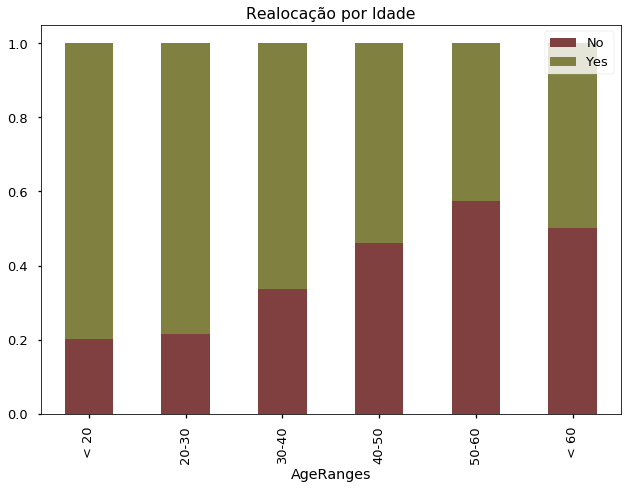

In [14]:
# A vontade de buscar um novo emprego diminui com a idade. Quase 80% das 
# pessoas abaixo dos 30 anos estão preparadas para isso.

# Agrupando os dados
df3 = pd.crosstab(df_ageranges.AgeRanges, 
                  df_ageranges.JobRelocateYesNo).apply(lambda r: r/r.sum(), 
                                                       axis = 1)

# Definindo a quantidade
num = len(df_ageranges.AgeRanges.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Barras (Stacked)
ax1 = df3.plot(kind = "bar", stacked = True, 
               color = listaRGB, title = "Realocação por Idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines,["No", "Yes"], loc = 'best')

## Idade x Horas de Aprendizagem

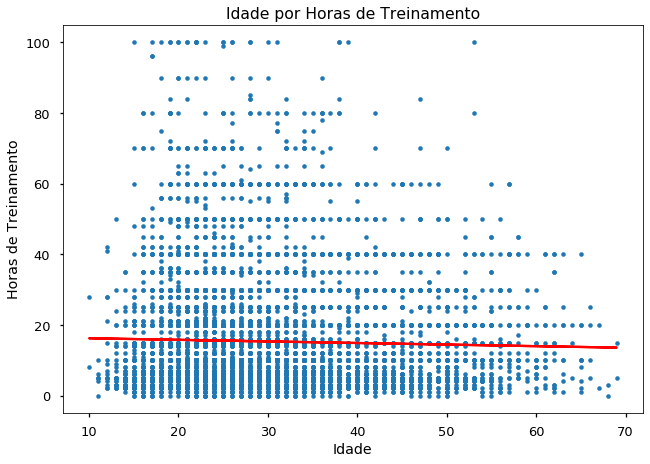

In [15]:
# A idade dos profissionais não afeta a quantidade de tempo gasto com 
# capacitação e treinamento.
import warnings
warnings.filterwarnings('ignore')

# Criando subset dos dados
df9 = df.copy()
df9 = df9.dropna(subset=["HoursLearning"])
df9 = df9[df['Age'].isin(range(0,70))]

# Definindo os valores de x e y
x = df9.Age
y = df9.HoursLearning

# Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Idade")
plt.ylabel("Horas de Treinamento")
plt.title("Idade por Horas de Treinamento")
plt.show()

## Investimento em Capacitação x Ganhos Salariais

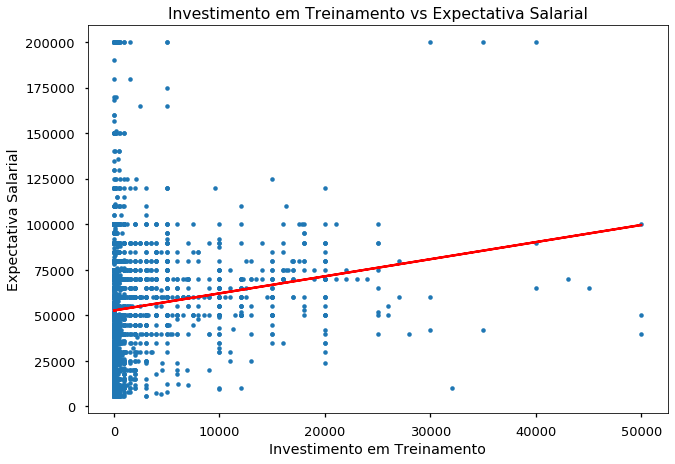

In [16]:
# Os profissionais que investem tempo e dinheiro em capacitação e 
# treinamento, em geral, conseguem salários mais altos, embora alguns 
# profisisonais esperem altos salários, investindo 0 em treinamento.
import warnings
warnings.filterwarnings('ignore')

# Criando subset dos dados
df5 = df.copy()
df5 = df5.dropna(subset=["ExpectedEarning"])
df5 = df5[df['MoneyForLearning'].isin(range(0,60000))]

# Definindo os valores de x e y
x = df5.MoneyForLearning
y = df5.ExpectedEarning

# Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Investimento em Treinamento")
plt.ylabel("Expectativa Salarial")
plt.title("Investimento em Treinamento vs Expectativa Salarial")
plt.show()

# Fim